In [ ]:
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', None)
import os
import numpy as np


In [5]:
output_folder_path ="/Volumes/samsung-4tb/b2p/impact-model/cleaned_data/hex_data/"
input_data_path = os.path.join(output_folder_path, "all_countries_merged_hex8.parquet")

In [6]:
hex_data = pd.read_parquet(input_data_path)
hex_data

,h3_index,population,pop_0_4,females_0_4,males_0_4,pop_5_9,females_5_9,males_5_9,pop_10_14,females_10_14,males_10_14,pop_0_9,females_0_9,males_0_9,pop_15_49,females_15_49,males_15_49,pop_50_64,females_50_64,males_50_64,pop_65_plus,females_65_plus,males_65_plus,births,pregnancies,rwi,underweight,female_educational_attainment_mean,male_educational_attainment_mean,travel_time_no_sites_all_health,time_delta_no_sites_semi_dense_urban,travel_time_health_posts,travel_time_major_roads,travel_time_no_sites_secondary_schools,travel_time_secondary_schools,travel_time_no_sites_health_centers,travel_time_no_sites_major_roads,time_delta_no_sites_secondary_schools,time_delta_no_sites_all_health,travel_time_health_centers,time_delta_no_sites_health_centers,time_delta_no_sites_major_roads,travel_time_semi_dense_urban,time_delta_no_sites_major_hospitals,travel_time_all_health,travel_time_no_sites_primary_schools,travel_time_no_sites_semi_dense_urban,time_delta_no_sites_health_posts,travel_time_no_sites_all_education,travel_time_major_hospitals,travel_time_no_sites_major_hospitals,travel_time_primary_schools,time_delta_no_sites_primary_schools,travel_time_all_education,time_delta_no_sites_all_education,travel_time_no_sites_health_posts,geometry,country_name
0,887512209bfffff,5,1,0,0,0,0,0,0,0,0,1,0,0,2,1,1,0,0,0,0,0,0,0,0,-0.277,0.165,3.0,5.1,174.0,0.0,358,59,0.0,0,174.0,59.0,0.0,0.0,174,0.0,0.0,144,0.0,174,NaN,144.0,0.0,NaN,0,0.0,1607,NaN,1599,NaN,358.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,civ
1,8875ae4635fffff,22,3,2,1,3,1,1,2,1,1,7,3,3,10,4,5,1,0,0,0,0,0,0,0,-0.768,0.156,2.4,4.8,858.0,0.0,341,857,0.0,0,858.0,857.0,0.0,0.0,858,0.0,0.0,880,0.0,858,952.0,880.0,0.0,884.0,0,0.0,952,0.0,884,0.0,341.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,civ
2,88753244dbfffff,40,7,3,3,6,3,3,4,2,2,13,6,6,17,9,8,3,1,1,1,0,0,0,0,-0.603,0.144,1.9,3.4,739.0,0.0,271,376,430.0,430,739.0,376.0,0.0,0.0,739,0.0,0.0,399,0.0,739,367.0,399.0,0.0,367.0,1154,1154.0,367,0.0,367,0.0,271.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,civ
3,8875ab8c3bfffff,8,1,0,0,1,0,0,0,0,0,2,1,1,4,2,2,0,0,0,0,0,0,0,0,-0.400,0.143,3.3,4.9,0.0,0.0,181,64,0.0,0,0.0,64.0,0.0,0.0,0,0.0,0.0,1047,0.0,0,0.0,1047.0,0.0,1426.0,897,897.0,0,0.0,1426,0.0,181.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,civ
4,8875ad3897fffff,25,4,2,2,3,1,1,3,1,1,8,3,4,11,5,5,1,0,0,0,0,0,1,2,-0.139,0.160,2.8,4.6,590.0,0.0,272,24,853.0,853,590.0,24.0,0.0,0.0,590,0.0,0.0,250,0.0,590,956.0,250.0,0.0,559.0,998,998.0,956,0.0,559,0.0,272.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,civ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064788,8896315601fffff,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.571,0.124,4.1,4.8,861.0,0.0,953,981,998.0,998,861.0,981.0,0.0,0.0,861,0.0,0.0,828,0.0,861,479.0,828.0,0.0,479.0,996,996.0,479,0.0,479,0.0,953.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,zmb
2064789,889606a35dfffff,10,1,0,0,1,0,0,1,0,0,3,1,1,4,2,2,0,0,0,0,0,0,0,0,-0.059,0.147,5.9,6.4,602.0,0.0,748,710,1144.0,1144,602.0,710.0,0.0,0.0,602,0.0,0.0,0,0.0,602,206.0,0.0,0.0,206.0,0,0.0,206,0.0,206,0.0,748.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,zmb
2064790,88961c1aa1fffff,15,2,1,1,2,1,1,2,1,1,5,2,2,7,3,3,0,0,0,0,0,0,0,0,-0.427,0.169,5.8,7.1,227.0,0.0,292,148,703.0,703,227.0,148.0,0.0,0.0,227,0.0,0.0,676,0.0,227,233.0,676.0,0.0,233.0,1066,1066.0,233,0.0,233,0.0,292.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,zmb
2064791,889631126bfffff,60,10,4,5,8,4,4,7,3,3,18,9,9,27,13,13,4,2,1,2,1,0,6,9,-0.476,0.127,4.5,5.5,284.0,0.0,121,39,269.0,269,284.0,39.0,0.0,0.0,284,0.0,0.0,1380,0.0,284,84.0,1380.0,0.0,84.0,256,256.0,84,0.0,84,0.0,121.0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,zmb


In [ ]:
# define quantiles for population column
quantiles = hex_data['population'].quantile([.2, 0.4, 0.6, 0.8]).values
print (hex_data['population'].max())
print (quantiles)

113340
[1.3000e+01 3.2000e+01 7.3000e+01 1.7900e+02 1.1334e+05]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


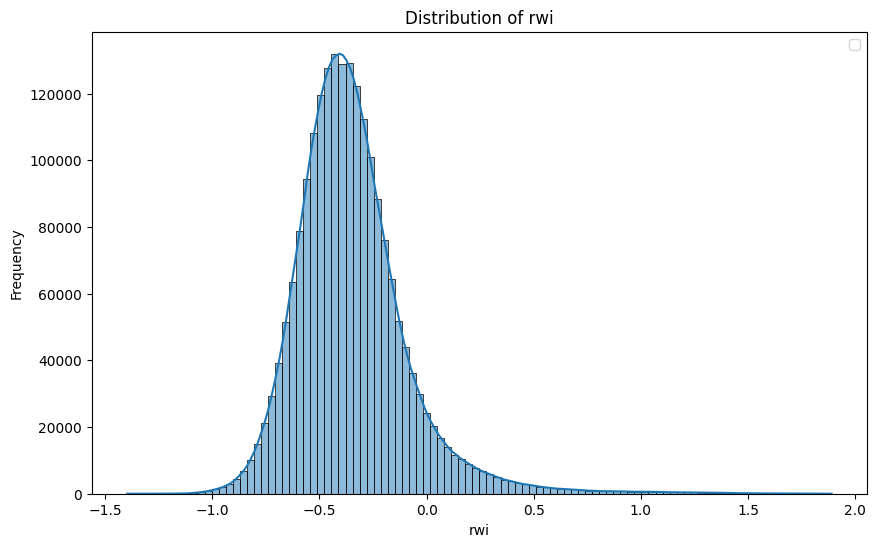

In [30]:
# plot distribution of rwi column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(hex_data['rwi'], bins=100, kde=True)
# plt.axvline(quantiles[0], color='r', linestyle='--', label='20th percentile')
# plt.axvline(quantiles[1], color='g', linestyle='--', label='40th percentile')
# plt.axvline(quantiles[2], color='b', linestyle='--', label='60th percentile')
# plt.axvline(quantiles[3], color='y', linestyle='--', label='80th percentile')
plt.title('Distribution of rwi')
plt.xlabel('rwi')
plt.ylabel('Frequency')
plt.legend()
# plt.savefig(os.path.join(output_folder_path, "population_distribution.png"), dpi=300)
plt.show()

In [ ]:
data_map = {}
for c in hex_data.columns:
    # add the name of the column to the dictionary with an empty dictionary
    # if column is numeric
    if hex_data[c].dtype in ["int64", "float64", "int32", "float32"]:
        data_map[c] = {
            "data_info": {
                "min": hex_data[c].min(),
                "max": hex_data[c].max(),
                "mean": hex_data[c].mean(),
                "median": hex_data[c].median(),
                "std": hex_data[c].std(),
                "quantiles": hex_data[c]
                .quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
                .tolist(),
                "98th_percentile": hex_data[c].quantile(0.98),
                "99th_percentile": hex_data[c].quantile(0.99),
                "2_percentile": hex_data[c].quantile(0.02),
                "1_percentile": hex_data[c].quantile(0.01),
                "style_stops": []
            },
            "meta_info": {
                "category": "Demographics",
                "name": c,
                "info_text": c,
                "hover_text": c,
                "unit": "people",
                "color_scale": "YlGnBu",
                "reverse_color_scale": False,
                "legend_labels": ["More People", "Less People"],
            },
            "travel_time": {
                "travel_time": True,
                "bridges": "with bridges",
                "destination": "hospital",
            },
        }

    else:
        print(f"Column {c} is not numeric")

Column h3_index is not numeric
Column geometry is not numeric
Column country_name is not numeric


In [18]:
print (data_map)
# in new file make all True values lower case


{'population': {'data_info': {'min': 1, 'max': 113340, 'mean': 150.5676234857441, 'median': 48.0, 'std': 581.3796332894971, 'quantiles': [7.0, 13.0, 21.0, 32.0, 48.0, 73.0, 113.0, 179.0, 321.0], '98th_percentile': 873.0, '99th_percentile': 1397.0, '2_percentile': 3.0, '1_percentile': 2.0, 'style_stops': []}, 'meta_info': {'category': 'Demographics', 'name': 'population', 'info_text': 'population', 'hover_text': 'population', 'unit': 'people', 'color_scale': 'YlGnBu', 'legend_labels': ['More People', 'Less People']}, 'travel_time': {'travel_time': True, 'bridges': 'with bridges', 'destination': 'hospital'}}, 'pop_0_4': {'data_info': {'min': 0, 'max': 12801, 'mean': 23.162471976609762, 'median': 7.0, 'std': 75.44574486267597, 'quantiles': [1.0, 2.0, 3.0, 5.0, 7.0, 12.0, 18.0, 29.0, 52.0], '98th_percentile': 137.0, '99th_percentile': 217.0, '2_percentile': 0.0, '1_percentile': 0.0, 'style_stops': []}, 'meta_info': {'category': 'Demographics', 'name': 'pop_0_4', 'info_text': 'pop_0_4', 'ho

Rules for defining stops a work in progress:
- all color stops will be in a series of 5. what colors map to this will be decided later.
- demographic stops will use custom quantiles right now trying 10%, 30%, 50%, 80%, 98%
- female education uses 10, 30, 50, 80, 98 percentiles from male data set. this is to show the disparity between the two data sets. female education will show more red than male as it's lower. regardless of stops, they should use the same.

Travel Time stops:
- all health = [15, 45, 90, 120, 150]
- health centers = [15, 45, 90, 120, 150]
- health posts = [15, 45, 90, 120, 150]
- major hospitals = [15, 60, 105, 150, 210]
- semi dense urban = [15, 60, 105, 150, 210]
- all education = [15, 30, 45, 60, 90]
- primary school = [15, 30, 45, 60, 90]
- secondary school = [15, 30, 45, 60, 90]
- major road = [15, 60, 105, 150, 210]

Delta values for now will be:
[0, 1, 15, 30, 45]
